In [22]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer #for missing data
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.transforms import Affine2D


file_path ='heaf.xlsx'
music_data= pd.read_excel(file_path)



music_data.dtypes   #types of data like int, character,..
music_data.isna().sum()  #number of missing data

music_data.dropna(subset=['PROPERTY: BCC/FCC/other'], inplace=True) #drop data that are output
music_data.isna().sum() #check number of missing data again


x=music_data.drop(columns=['PROPERTY: BCC/FCC/other'])
y=music_data['PROPERTY: BCC/FCC/other']

#for missing data
cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
num_imputer=SimpleImputer(strategy='constant',fill_value=0)


#define column
cat_features=['PROPERTY: Processing method','PROPERTY: Type of test','PROPERTY: Microstructure']
num_features=['PROPERTY: grain size ($\mu$m)','PROPERTY: Exp. Density (g/cm$^3$)','PROPERTY: HV','PROPERTY: Test temperature ($^\circ$C)','PROPERTY: YS (MPa)',
             'PROPERTY: UTS (MPa)','PROPERTY: Elongation (%)','PROPERTY: Elongation plastic (%)','PROPERTY: Exp. Young modulus (GPa)','PROPERTY: Calculated Young modulus (GPa)',
             'PROPERTY: O content (wppm)','PROPERTY: N content (wppm)','PROPERTY: C content (wppm)']

#create imputer
imputer=ColumnTransformer([
    ('cat_imputer',cat_imputer,cat_features),
    ('num_imputer',num_imputer,num_features)
])


filled_x=imputer.fit_transform(x)
#filled_x

#checking data got filled
filled_data=pd.DataFrame(filled_x,columns=['PROPERTY: Processing method','PROPERTY: Type of test','PROPERTY: Microstructure','PROPERTY: grain size ($\mu$m)','PROPERTY: Exp. Density (g/cm$^3$)','PROPERTY: HV','PROPERTY: Test temperature ($^\circ$C)','PROPERTY: YS (MPa)',
             'PROPERTY: UTS (MPa)','PROPERTY: Elongation (%)','PROPERTY: Elongation plastic (%)','PROPERTY: Exp. Young modulus (GPa)','PROPERTY: Calculated Young modulus (GPa)',
             'PROPERTY: O content (wppm)','PROPERTY: N content (wppm)','PROPERTY: C content (wppm)'])
filled_data.isna().sum()


categorical_features=['PROPERTY: Processing method','PROPERTY: Type of test','PROPERTY: Microstructure']   #categorical features to convert into number
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',one_hot,categorical_features)],remainder='passthrough')
transformed_x=transformer.fit_transform(filled_data)

# Convert sparse matrix to dense
transformed_x = transformed_x.toarray()

dummies=pd.get_dummies(music_data[['PROPERTY: Processing method','PROPERTY: Type of test','PROPERTY: Microstructure','PROPERTY: grain size ($\mu$m)','PROPERTY: Exp. Density (g/cm$^3$)','PROPERTY: HV','PROPERTY: Test temperature ($^\circ$C)','PROPERTY: YS (MPa)',
             'PROPERTY: UTS (MPa)','PROPERTY: Elongation (%)','PROPERTY: Elongation plastic (%)','PROPERTY: Exp. Young modulus (GPa)','PROPERTY: Calculated Young modulus (GPa)',
            'PROPERTY: O content (wppm)','PROPERTY: N content (wppm)','PROPERTY: C content (wppm)']])
dummies



,PROPERTY: grain size ($\mu$m),PROPERTY: Exp. Density (g/cm$^3$),PROPERTY: HV,PROPERTY: Test temperature ($^\circ$C),PROPERTY: YS (MPa),PROPERTY: UTS (MPa),PROPERTY: Elongation (%),PROPERTY: Elongation plastic (%),PROPERTY: Exp. Young modulus (GPa),PROPERTY: Calculated Young modulus (GPa),...,PROPERTY: Microstructure_FCCHCP,PROPERTY: Microstructure_FCCHCPSec.,PROPERTY: Microstructure_FCCL12,PROPERTY: Microstructure_FCCL12B2,PROPERTY: Microstructure_FCCL12Sec.,PROPERTY: Microstructure_FCCLaves,PROPERTY: Microstructure_FCCLavesSec.,PROPERTY: Microstructure_FCCSec.,PROPERTY: Microstructure_L12B2,PROPERTY: Microstructure_Other
0,NaN,NaN,138.0,25.0,158.0,NaN,NaN,NaN,NaN,192.0,...,False,False,False,False,False,False,False,False,False,False
1,NaN,NaN,212.0,25.0,346.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
2,NaN,NaN,385.0,25.0,794.0,NaN,NaN,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,False,False
3,NaN,NaN,456.0,25.0,964.0,NaN,NaN,NaN,NaN,162.0,...,False,False,False,False,False,False,False,False,False,False
4,NaN,NaN,125.0,25.0,204.0,NaN,NaN,NaN,NaN,207.0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,NaN,NaN,270.0,NaN,NaN,NaN,NaN,NaN,NaN,119.0,...,False,False,False,False,False,False,False,False,False,False
1541,NaN,NaN,482.0,NaN,NaN,NaN,NaN,NaN,NaN,222.0,...,False,False,False,False,False,False,False,False,False,False
1542,NaN,NaN,446.0,NaN,NaN,NaN,NaN,NaN,NaN,222.0,...,False,False,False,False,False,False,False,False,False,False
1543,NaN,NaN,407.0,NaN,NaN,NaN,NaN,NaN,NaN,179.0,...,False,False,False,False,False,False,False,False,False,False


In [28]:
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.2)

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
prediction=model.predict(x_test)
score=accuracy_score(y_test,prediction)
score*100

99.67637540453075

In [29]:
model1 = SVC(kernel='rbf',probability=True)  # You can choose different kernels like 'linear', 'rbf', 'poly', etc.
model1.fit(x_train, y_train)

prediction1=model1.predict(x_test)

score1=accuracy_score(y_test,prediction1)
score1*100

91.58576051779936

In [66]:
model2 = RandomForestClassifier(n_estimators=100,random_state=42)  # n_estimators is the number of trees in the forest
model2.fit(x_train, y_train)
prediction2=model2.predict(x_test)
score2=accuracy_score(y_test,prediction2)
score2*100

100.0

In [32]:
model3 = KNeighborsClassifier(n_neighbors=13)  # n_neighbors is the number of neighbors to use
model3.fit(x_train, y_train)

prediction3=model3.predict(x_test)

score3=accuracy_score(y_test,prediction3)
score3*100

86.40776699029125

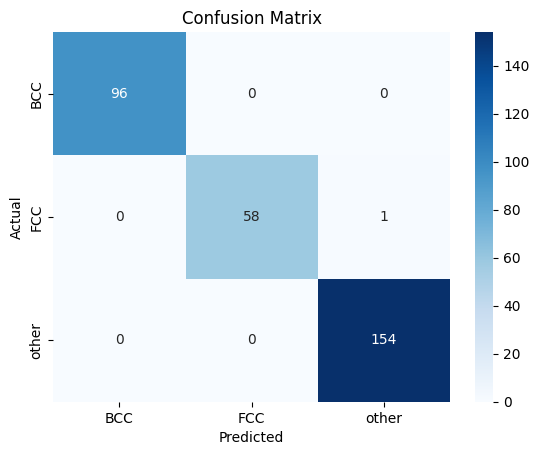

In [33]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, prediction)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


one_hot__PROPERTY: Microstructure_FCC                  1.068097e-17
remainder__PROPERTY: C content (wppm)                  5.006862e-18
remainder__PROPERTY: HV                                7.228599e-19
remainder__PROPERTY: Calculated Young modulus (GPa)    5.988258e-20
one_hot__PROPERTY: Microstructure_FCCHCPSec.           0.000000e+00
one_hot__PROPERTY: Microstructure_FCCLaves             0.000000e+00
dtype: float64


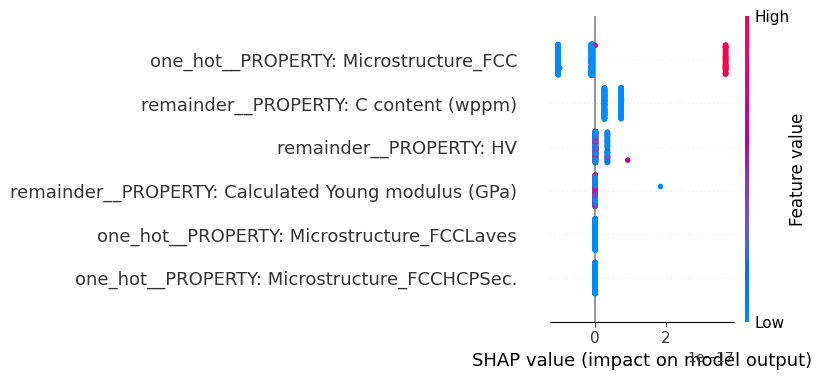

In [53]:
!pip3 install shap
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

# Average the SHAP values across the 3 classes (axis=-1)
shap_values_avg = np.mean(shap_values, axis=-1)

# Calculate mean absolute SHAP values across samples (axis=0)
shap_values_abs = np.mean(np.abs(shap_values_avg), axis=0)

# Get feature names after one-hot encoding
feature_names = transformer.get_feature_names_out()

# Ensure the lengths match
assert len(shap_values_abs) == len(feature_names), "Length mismatch between SHAP values and feature names!"

# Convert SHAP values to a Pandas Series with the correct feature names
shap_values_series = pd.Series(shap_values_abs, index=feature_names)

# Sort features by importance
sorted_features = shap_values_series.sort_values(ascending=False)

# Select the top N features (e.g., top 10)
N = 6
top_n_features = sorted_features.head(N)

# Display the top N features
print(top_n_features)

# Get indices of the top N features
top_n_indices = [np.where(feature_names == feature)[0][0] for feature in top_n_features.index]

# Plot SHAP summary plot for top N features
shap.summary_plot(shap_values_avg[:, top_n_indices], x_test[:, top_n_indices], feature_names=top_n_features.index)


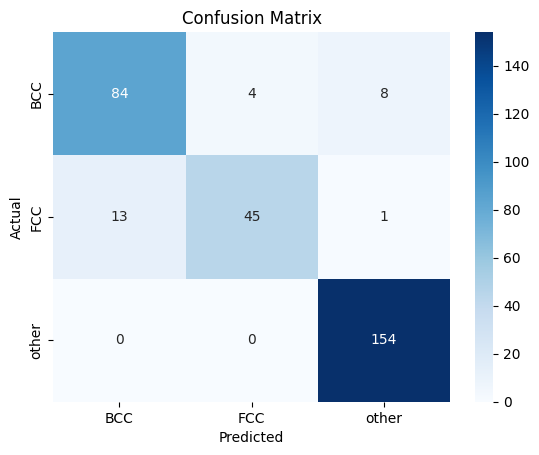

In [35]:
#confusion matrix
conf_matrix = confusion_matrix(y_test, prediction1)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model1.classes_, yticklabels=model1.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


  0%|          | 0/309 [00:00<?, ?it/s]

Shape of shap_values_avg after averaging: (63, 3)
Shape of shap_values_avg after flattening: (63,)
Number of feature names: 63
Length of shap_values_avg: 63
SHAP values series created successfully.
remainder__PROPERTY: Calculated Young modulus (GPa)    0.290356
remainder__PROPERTY: YS (MPa)                          0.087316
remainder__PROPERTY: Test temperature ($^\circ$C)      0.047912
remainder__PROPERTY: C content (wppm)                  0.046296
remainder__PROPERTY: UTS (MPa)                         0.033084
remainder__PROPERTY: HV                                0.024104
dtype: float64
Shape of shap_values_for_plot: (309, 6)
Shape of x_test[:, top_n_indices]: (309, 6)


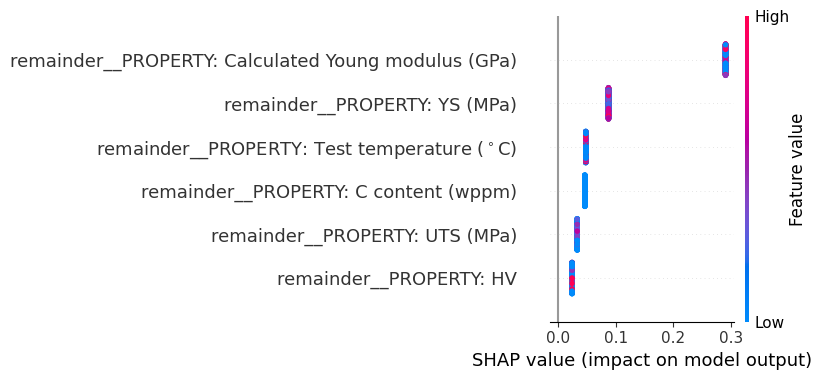

In [44]:
import shap
# Reduce the size of the background dataset
background_data = shap.sample(x_train, 10)  # Use 100 as an example

explainer = shap.KernelExplainer(model1.predict_proba, background_data)
shap_values = explainer.shap_values(x_test)


# Check if shap_values is a list (for multiclass classification)
if isinstance(shap_values, list):
    shap_values_array = np.array(shap_values)  # Shape: (num_classes, num_samples, num_features)
    print("Initial shape of shap_values_array:", shap_values_array.shape)

    # Average across classes and samples
    shap_values_avg = np.mean(np.abs(shap_values_array), axis=(0, 1))  # Shape: (num_features,)
    print("Shape of shap_values_avg after averaging:", shap_values_avg.shape)
else:
    shap_values_avg = np.mean(np.abs(shap_values), axis=0)  # Shape: (num_features,)
    print("Shape of shap_values_avg after averaging:", shap_values_avg.shape)

# Check if shap_values_avg is 2D and flatten if necessary
if shap_values_avg.ndim == 2:
    shap_values_avg = np.mean(shap_values_avg, axis=1)  # Collapse the second dimension
    print("Shape of shap_values_avg after flattening:", shap_values_avg.shape)

# Get feature names
feature_names = transformer.get_feature_names_out()
print("Number of feature names:", len(feature_names))
print("Length of shap_values_avg:", len(shap_values_avg))

# Ensure the lengths match
if len(shap_values_avg) == len(feature_names):
    # Convert SHAP values to a Pandas Series with the correct feature names
    shap_values_series = pd.Series(shap_values_avg, index=feature_names)
    print("SHAP values series created successfully.")
else:
    print("Length mismatch between SHAP values and feature names!")

# Sort features by importance
sorted_features = shap_values_series.sort_values(ascending=False)

# Select the top N features (e.g., top 6)
N = 6
top_n_features = sorted_features.head(N)
print(top_n_features)

# Get indices of the top N features
top_n_indices = [list(feature_names).index(feature) for feature in top_n_features.index]

# Extract SHAP values for the top N features
shap_values_for_plot = np.array([shap_values_avg[i] for i in top_n_indices])
shap_values_for_plot = np.vstack([shap_values_for_plot] * x_test.shape[0])  # Shape: (num_samples, num_features)
print("Shape of shap_values_for_plot:", shap_values_for_plot.shape)

# Ensure x_test shape is compatible with shap_values_for_plot
print("Shape of x_test[:, top_n_indices]:", x_test[:, top_n_indices].shape)
assert x_test[:, top_n_indices].shape[1] == shap_values_for_plot.shape[1], \
    "Mismatch between x_test and SHAP values dimensions."

# Plot SHAP summary plot for top N features
shap.summary_plot(shap_values_for_plot, x_test[:, top_n_indices], feature_names=top_n_features.index)



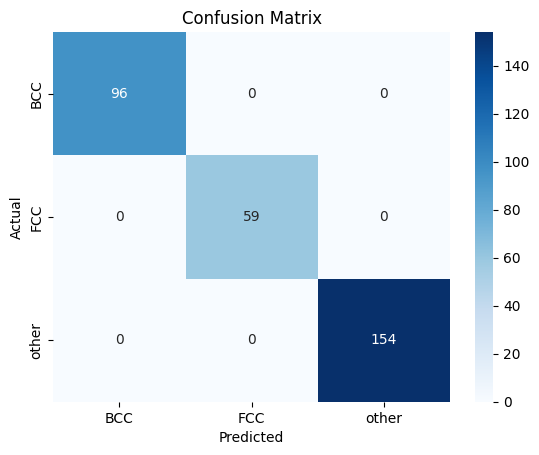

In [37]:
conf_matrix = confusion_matrix(y_test, prediction2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model2.classes_, yticklabels=model2.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


one_hot__PROPERTY: Microstructure_FCC                  7.803449e-17
one_hot__PROPERTY: Microstructure_FCCBCC               7.333090e-17
remainder__PROPERTY: Calculated Young modulus (GPa)    7.030215e-17
one_hot__PROPERTY: Microstructure_BCCSec.              6.834006e-17
one_hot__PROPERTY: Microstructure_BCCLaves             6.752977e-17
one_hot__PROPERTY: Microstructure_FCCSec.              6.580534e-17
dtype: float64


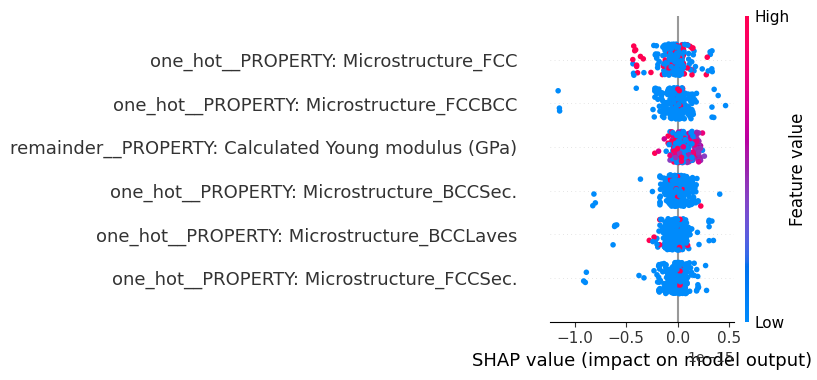

In [47]:
import shap
explainer = shap.TreeExplainer(model2)
shap_values = explainer.shap_values(x_test)

# Average the SHAP values across the classes (axis=-1) to get a single SHAP value per feature
shap_values_avg = np.mean(shap_values, axis=-1)

# Calculate mean absolute SHAP values across samples (axis=0)
shap_values_abs = np.mean(np.abs(shap_values_avg), axis=0)

# Get feature names after one-hot encoding
feature_names = transformer.get_feature_names_out()

# Ensure the lengths match
assert len(shap_values_abs) == len(feature_names), "Length mismatch between SHAP values and feature names!"

# Convert SHAP values to a Pandas Series with the correct feature names
shap_values_series = pd.Series(shap_values_abs, index=feature_names)

# Sort features by importance
sorted_features = shap_values_series.sort_values(ascending=False)

# Select the top N features (e.g., top 8)
N = 6
top_n_features = sorted_features.head(N)

# Display the top N features
print(top_n_features)

# Get indices of the top N features
top_n_indices = [np.where(feature_names == feature)[0][0] for feature in top_n_features.index]

# Plot SHAP summary plot for top N features
shap.summary_plot(shap_values_avg[:, top_n_indices], x_test[:, top_n_indices], feature_names=top_n_features.index)




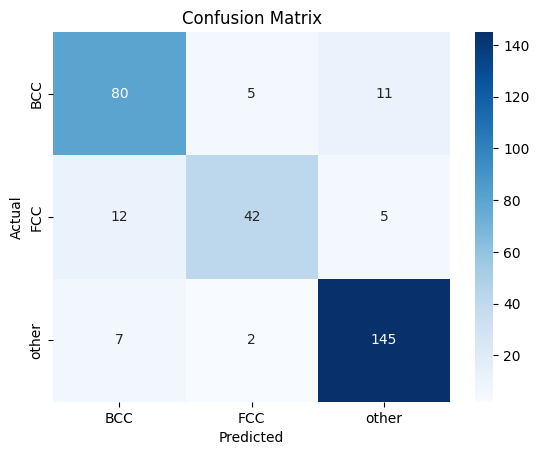

In [39]:
conf_matrix = confusion_matrix(y_test, prediction3)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model3.classes_, yticklabels=model3.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

  0%|          | 0/309 [00:00<?, ?it/s]

Shape of shap_values_avg after averaging: (63, 3)
Shape of shap_values_avg after flattening: (63,)
Number of feature names: 63
Length of shap_values_avg: 63
SHAP values series created successfully.
remainder__PROPERTY: Calculated Young modulus (GPa)    0.165466
remainder__PROPERTY: YS (MPa)                          0.091010
remainder__PROPERTY: Test temperature ($^\circ$C)      0.071733
remainder__PROPERTY: UTS (MPa)                         0.050134
remainder__PROPERTY: HV                                0.036328
remainder__PROPERTY: Exp. Young modulus (GPa)          0.004014
dtype: float64
Shape of shap_values_for_plot: (309, 6)
Shape of x_test[:, top_n_indices]: (309, 6)


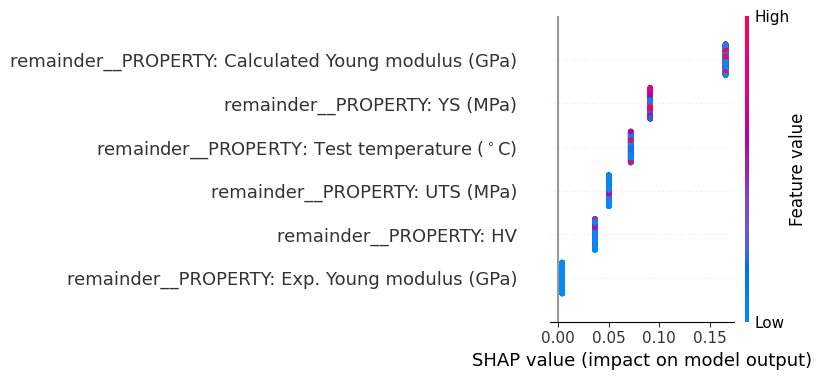

In [40]:
import shap
# Reduce the size of the background dataset
background = shap.kmeans(x_train, 100)

explainer = shap.KernelExplainer(model3.predict_proba, background )
shap_values = explainer.shap_values(x_test)
# Check if shap_values is a list (for multiclass classification)
if isinstance(shap_values, list):
    shap_values_array = np.array(shap_values)  # Shape: (num_classes, num_samples, num_features)
    print("Initial shape of shap_values_array:", shap_values_array.shape)

    # Average across classes and samples
    shap_values_avg = np.mean(np.abs(shap_values_array), axis=(0, 1))  # Shape: (num_features,)
    print("Shape of shap_values_avg after averaging:", shap_values_avg.shape)
else:
    shap_values_avg = np.mean(np.abs(shap_values), axis=0)  # Shape: (num_features,)
    print("Shape of shap_values_avg after averaging:", shap_values_avg.shape)

# Check if shap_values_avg is 2D and flatten if necessary
if shap_values_avg.ndim == 2:
    shap_values_avg = np.mean(shap_values_avg, axis=1)  # Collapse the second dimension
    print("Shape of shap_values_avg after flattening:", shap_values_avg.shape)

# Get feature names
feature_names = transformer.get_feature_names_out()
print("Number of feature names:", len(feature_names))
print("Length of shap_values_avg:", len(shap_values_avg))

# Ensure the lengths match
if len(shap_values_avg) == len(feature_names):
    # Convert SHAP values to a Pandas Series with the correct feature names
    shap_values_series = pd.Series(shap_values_avg, index=feature_names)
    print("SHAP values series created successfully.")
else:
    print("Length mismatch between SHAP values and feature names!")

# Sort features by importance
sorted_features = shap_values_series.sort_values(ascending=False)

# Select the top N features (e.g., top 6)
N = 6
top_n_features = sorted_features.head(N)
print(top_n_features)

# Get indices of the top N features
top_n_indices = [list(feature_names).index(feature) for feature in top_n_features.index]

# Extract SHAP values for the top N features
shap_values_for_plot = np.array([shap_values_avg[i] for i in top_n_indices])
shap_values_for_plot = np.vstack([shap_values_for_plot] * x_test.shape[0])  # Shape: (num_samples, num_features)
print("Shape of shap_values_for_plot:", shap_values_for_plot.shape)

# Ensure x_test shape is compatible with shap_values_for_plot
print("Shape of x_test[:, top_n_indices]:", x_test[:, top_n_indices].shape)
assert x_test[:, top_n_indices].shape[1] == shap_values_for_plot.shape[1], \
    "Mismatch between x_test and SHAP values dimensions."

# Plot SHAP summary plot for top N features
shap.summary_plot(shap_values_for_plot, x_test[:, top_n_indices], feature_names=top_n_features.index)



